# Data Imports and Libraries

In [2]:
!pip install emoji
!pip install wordcloud
!pip install tensorflow
!pip install keras
!pip install sklearn
!pip install imblearn
!pip install keras-tuner

In [3]:
#data pre-processing
import pandas as pd
import numpy as np
import string
import re
import nltk
import wordcloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
import emoji


# Data visualization
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import wordcloud

#Data Transformation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

#Data Modelling
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Input, LSTM, Dropout
from tensorflow.keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.layers.core import Dense, Dropout, Activation, Lambda

#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report #classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score, roc_curve, roc_auc_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
data = pd.read_csv('suspicious tweets.csv', encoding='utf-8', header='infer')
data
#0 - suspicious tweets
#1 - non-suspicious tweets

,message,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1
1,is upset that he can't update his Facebook by ...,1
2,@Kenichan I dived many times for the ball. Man...,1
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",1
...,...,...
59995,"Really wants to go and see 17 again, because Z...",1
59996,@krissa22 Thank you!,1
59997,dreaming of you,1
59998,@TheEllenShow I saw a clip online! good show!,1


## Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  60000 non-null  object
 1   label    60000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.6+ KB


In [6]:
print(data.dtypes)
print(data.shape)

message    object
label       int64
dtype: object
(60000, 2)


In [7]:
data['label'].value_counts()

1    53855
0     6145
Name: label, dtype: int64

In [8]:
data.describe()

,label
count,60000.000000
mean,0.897583
std,0.303198
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
data.describe(include=object)

,message
count,60000
unique,59703
top,@tweetchild Clean Me!
freq,7


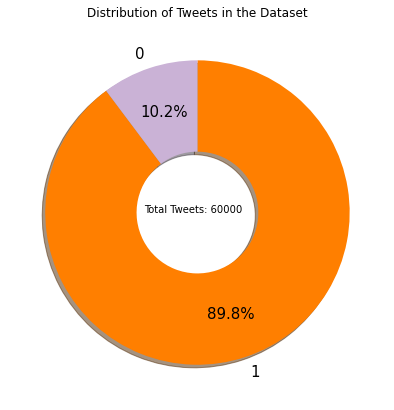

In [10]:
plt.figure(figsize = (7,7))
sorted_counts = data['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(data.shape[0]))
plt.title('Distribution of Tweets in the Dataset');

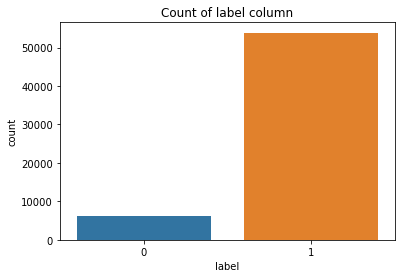

In [11]:
g = sns.countplot(x="label", data=data).set(title="Count of label column")
plt.show()

In [12]:
#Identifying missing data
data.isnull().sum()

message    0
label      0
dtype: int64

## Data Pre-processing

In [13]:
data = data.drop_duplicates(keep = 'first', inplace=False)
data

,message,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1
1,is upset that he can't update his Facebook by ...,1
2,@Kenichan I dived many times for the ball. Man...,1
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",1
...,...,...
59995,"Really wants to go and see 17 again, because Z...",1
59996,@krissa22 Thank you!,1
59997,dreaming of you,1
59998,@TheEllenShow I saw a clip online! good show!,1


In [14]:
tweet_data = data
tweet_data['message'].str.lower()

0        @switchfoot http://twitpic.com/2y1zl - awww, t...
1        is upset that he can't update his facebook by ...
2        @kenichan i dived many times for the ball. man...
3          my whole body feels itchy and like its on fire 
4        @nationwideclass no, it's not behaving at all....
                               ...                        
59995    really wants to go and see 17 again, because z...
59996                                @krissa22 thank you! 
59997                                     dreaming of you 
59998       @theellenshow i saw a clip online!  good show!
59999               @msdivineknight k hun, no worries!  xx
Name: message, Length: 59707, dtype: object

In [15]:
#convert emoji into word
def demojize(word):
  word = emoji.demojize(word)
  return word

tweet_data['message'].apply(demojize)

0        @switchfoot http://twitpic.com/2y1zl - Awww, t...
1        is upset that he can't update his Facebook by ...
2        @Kenichan I dived many times for the ball. Man...
3          my whole body feels itchy and like its on fire 
4        @nationwideclass no, it's not behaving at all....
                               ...                        
59995    Really wants to go and see 17 again, because Z...
59996                                @krissa22 Thank you! 
59997                                     dreaming of you 
59998       @TheEllenShow I saw a clip online!  good show!
59999               @msdivineknight k hun, no worries!  xx
Name: message, Length: 59707, dtype: object

In [16]:
from nltk.corpus import wordnet
Tweets = []
Labels = []

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
for row in tweet_data['message']:
    #tokenize words
    words = nltk.word_tokenize(row)

    #remove punctuations
    clean_words = [word.lower() for word in words if word not in set(string.punctuation)]

    #remove stop words
    english_stops = set(stopwords.words('english'))
    characters_to_remove = ["''",'``',"rt","https","’","“","”","\u200b","--","n't","'s","...","//t.c","&quot", "quot"]
    clean_words = [word for word in clean_words if word not in english_stops]
    clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
    
    #Lemmatize with POS Tagging
    wordnet_lemmatizer = nltk.WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in clean_words]
    Tweets.append(lemma_list)

for row in tweet_data['label']:
  Labels.append(row)

In [17]:
tokenized_data = list(zip(Tweets, Labels))
finale_data = pd.DataFrame(tokenized_data, columns = ['Message', 'Label'])
finale_data

,Message,Label
0,"[switchfoot, http, //twitpic.com/2y1zl, awww, ...",1
1,"[upset, ca, update, facebook, texting, might, ...",1
2,"[kenichan, dive, many, time, ball, manage, sav...",1
3,"[whole, body, feel, itchy, like, fire]",0
4,"[nationwideclass, behaving, 'm, mad, ca, see]",1
...,...,...
59702,"[really, want, go, see, 17, zac, efron, amazin...",1
59703,"[krissa22, thank]",1
59704,[dream],1
59705,"[theellenshow, saw, clip, online, good, show]",1


## Data Visualization

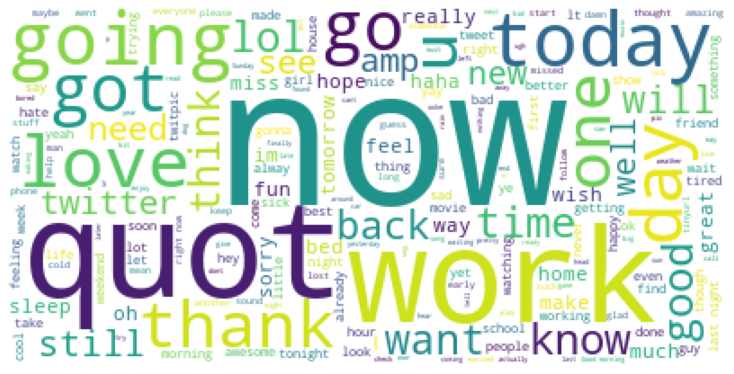

In [18]:
#Word Cloud
word_cloud = wordcloud.WordCloud(background_color='white').generate(''.join(tweet_data['message']))
plt.figure(figsize = (10, 5), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## Data Transformation

In [19]:
#split data into Training and Test
x_train, x_test, y_train, y_test = train_test_split(finale_data['Message'], finale_data['Label'], test_size = 0.2, random_state = 42)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

47765
11942
47765
11942


In [20]:
#Convert every token within the training and test data set into String
x_train_conv = [str (item) for item in x_train]
x_test_conv = [str (item) for item in x_test]
y_train_conv = [str (item) for item in y_train]
y_test_conv = [str (item) for item in y_test]

In [21]:
#Vectorize words for building model
vectorizer = CountVectorizer()

# learn a vocabulary dictionary of all tokens in raw documents
vectorizer.fit(list(x_train_conv) + list(x_test_conv))

# transform document into document-term matrix
x_train_vectorizer = vectorizer.transform(x_train_conv)
x_test_vectorizer = vectorizer.transform(x_test_conv)

In [ ]:
#Save Vectorizer as each time running. Different dimension is produced based on the Data partitioning
pickle.dump(vectorizer, open("Vectorize_Save", 'wb'))

In [22]:
# import library
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train_vectorizer, y_train_conv) # fit_resample(input, output)

# Data Modelling
## Naive Bayes

In [ ]:
## Naive Bayes
NB = MultinomialNB()  

## Fit & predict NB
NB_predict = NB.fit(x_smote, y_smote).predict(x_test_vectorizer)

## Evaluation of Naive Bayes
NB_eval = classification_report(y_test_conv, NB_predict, digits=4)

In [48]:
#Save naive bayes Model
import pickle
filename = 'NaiveBayes_Model.sav'
pickle.dump(NB, open(filename, 'wb'))

## Support Vector Machine

In [ ]:
SVM_Model = svm.SVC()

## Fit & predict
SVM_y_predict = SVM_Model.fit(x_smote, y_smote).predict(x_test_vectorizer)

#Evaluation of Support Vector Machine
SVM_Report = classification_report(y_test_conv, SVM_y_predict, digits=4)

In [37]:
#Save SVM Model
import pickle
filename = 'SVM_Model.sav'
pickle.dump(SVM_Model, open(filename, 'wb'))

## LSTM
### Sequencing

In [25]:
max_features = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
maxlen = 1
nb_classes = 1

In [26]:
tokenizer = Tokenizer(nb_words=max_features)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [27]:
from keras.preprocessing import sequence
from keras.utils import np_utils

X_train = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test = sequence.pad_sequences(sequences_test, maxlen=maxlen)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (47765, 1)
X_test shape: (11942, 1)


### LSTM Model Building

In [67]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=150, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
319/319 [==============================] - 3s 5ms/step - loss: 0.3781 - accuracy: 0.9040 - val_loss: 0.3101 - val_accuracy: 0.9076
Epoch 2/10
319/319 [==============================] - 1s 4ms/step - loss: 0.2799 - accuracy: 0.9121 - val_loss: 0.3132 - val_accuracy: 0.9060
Epoch 3/10
319/319 [==============================] - 1s 4ms/step - loss: 0.2640 - accuracy: 0.9184 - val_loss: 0.3200 - val_accuracy: 0.9064
Epoch 4/10
319/319 [==============================] - 1s 4ms/step - loss: 0.2571 - accuracy: 0.9185 - val_loss: 0.3247 - val_accuracy: 0.9057
Epoch 5/10
319/319 [==============================] - 1s 4ms/step - loss: 0.2523 - accuracy: 0.9188 - val_loss: 0.3309 - val_accuracy: 0.9063
Epoch 6/10
319/319 [==============================] - 1s 4ms/step - loss: 0.2487 - accuracy: 0.9193 - val_loss: 0.3370 - val_accuracy: 0.9065
Epoch 7/10
319/319 [==============================] - 1s 4ms/step - loss: 0.2460 - accuracy: 0.9195 - val_loss: 0.3492 - val_accuracy: 0.9065
Epoch 

In [68]:
y_pred_lstm = model.predict(X_test)
y_pred_lstm = (y_pred_lstm > 0.5)

In [125]:
#Save LSTM Model
model.save("LSTM_Model.h5")
print("Saved model to disk")

Saved model to disk


# Model Optimization
## Naive Bayes Optimization

In [162]:
from sklearn.model_selection import RandomizedSearchCV
# Naive Bayes Parameter Tuning
# define hyperparameters & random search
parameter = [{'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}]

Opt_NB_rand = RandomizedSearchCV(MultinomialNB(), parameter, n_jobs=-1, cv=5, verbose=5)

# Fit Optimize NB
nb_grid_rand = Opt_NB_rand.fit(x_smote, y_smote)
print(nb_grid_rand.best_params_)
print(nb_grid_rand.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'alpha': 1.0}
0.8031035525582213


In [ ]:
Opt_NB_randomize = MultinomialNB(alpha = 1.0)
Opt_NB_randomize_pred = Opt_NB_randomize.fit(x_smote, y_smote).predict(x_test_vectorizer)

In [79]:
#Save Naive Bayes Optimized Model
import pickle
filename = 'NaiveBayes_Optimized_Model_jpyter.sav'
pickle.dump(Opt_NB_rand, open(filename, 'wb'))

## Support Vector Machine Optimization

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}

rnd_search = RandomizedSearchCV(SVM_Model, param, n_iter =10, cv=9, verbose = 10)
rnd_search.fit(x_smote, y_smote)

Fitting 9 folds for each of 10 candidates, totalling 90 fits
[CV 1/9; 1/10] START C=4.874383934405895, gamma=0.010900003642988501............
[CV 1/9; 1/10] END C=4.874383934405895, gamma=0.010900003642988501; total time= 1.7min
[CV 2/9; 1/10] START C=4.874383934405895, gamma=0.010900003642988501............
[CV 2/9; 1/10] END C=4.874383934405895, gamma=0.010900003642988501; total time= 4.3min
[CV 3/9; 1/10] START C=4.874383934405895, gamma=0.010900003642988501............
[CV 3/9; 1/10] END C=4.874383934405895, gamma=0.010900003642988501; total time= 4.4min
[CV 4/9; 1/10] START C=4.874383934405895, gamma=0.010900003642988501............
[CV 4/9; 1/10] END C=4.874383934405895, gamma=0.010900003642988501; total time= 4.6min
[CV 5/9; 1/10] START C=4.874383934405895, gamma=0.010900003642988501............
[CV 5/9; 1/10] END C=4.874383934405895, gamma=0.010900003642988501; total time= 4.6min
[CV 6/9; 1/10] START C=4.874383934405895, gamma=0.010900003642988501............
[CV 6/9; 1/10] END

RandomizedSearchCV(cv=9, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000132A4083DC0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000132A422F550>},
                   verbose=10)

In [28]:
print(rnd_search.best_params_)
print(rnd_search.best_score_)

{'C': 9.211261446352069, 'gamma': 0.06382688379934433}
0.9156399918131749


In [ ]:
## Support Vector Machine
SVM_Model_opt = svm.SVC(C = 9.211261446352069, gamma = 0.06382688379934433)

## Fit & predict
SVM_y_predict_opt = SVM_Model_opt.fit(x_smote, y_smote).predict(x_test_vectorizer)

#Evaluation of Support Vector Machine
SVM_Report = classification_report(y_test_conv, SVM_y_predict_opt, digits=4)

In [33]:
#Save SVM Optimized Model
import pickle
filename = 'SVM_Optimized_Model.sav'
pickle.dump(SVM_Model_opt, open(filename, 'wb'))

## LSTM Optimization with keras tuner

In [31]:
def tune_LSTM(hp):
    model_opt = Sequential()
    model_opt.add(Embedding(max_features, 128))
    model_opt.add(Dropout(0.2))
    model_opt.add(LSTM(128)) 
    model_opt.add(Dense(nb_classes))
    model_opt.add(Activation('sigmoid'))
    model_opt.compile(loss='binary_crossentropy', 
                      optimizer=tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[0.01, 0.001, 0.0001])), 
                      metrics=['accuracy'])
    return model_opt

In [37]:
import keras_tuner as kt
tuner = kt.RandomSearch(
    tune_LSTM,
    objective='val_accuracy',
    max_trials=5)

tuner.search(X_train, y_train, epochs=10, verbose = 4, validation_data=(X_test, y_test))
LSTM_KerasTuner = tuner.get_best_models()[0]
tuner.results_summary()

Trial 3 Complete [00h 01m 03s]
val_accuracy: 0.9083068370819092

Best val_accuracy So Far: 0.9088929891586304
Total elapsed time: 00h 03m 21s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.9088929891586304
Trial summary
Hyperparameters:
learning_rate: 0.001
Score: 0.9083068370819092
Trial summary
Hyperparameters:
learning_rate: 0.01
Score: 0.9069669842720032


In [33]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
learning_rate: 0.001
Score: 0.9080556035041809
Trial summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.9078881144523621
Trial summary
Hyperparameters:
learning_rate: 0.01
Score: 0.9067158102989197


In [34]:
LSTM_KerasTuner.build(X_train)

In [35]:
LSTM_KerasTuner_pred = LSTM_KerasTuner.predict(X_test)
LSTM_KerasTuner_pred = (LSTM_KerasTuner_pred > 0.5)

In [38]:
#Save LSTM Model
LSTM_KerasTuner.save("LSTM_Optimized_Model.h5")
print("Saved model to disk")

Saved model to disk


# Model Evaluation

In [58]:
#Model Loading
import pickle
from keras.models import load_model
load_nb = pickle.load(open("all_model/NaiveBayes_Model.sav", 'rb')) 
load_nb_opt = pickle.load(open("all_model/NaiveBayes_Optimized_Model_jpyter.sav", 'rb'))
load_SVM = pickle.load(open("all_model/SVM_Model.sav", 'rb'))
load_SVM_opt = pickle.load(open("all_model/SVM_Optimized_Model.sav", 'rb'))
load_LSTM = load_model("all_model/LSTM_Model.h5")
load_LSTM_Opt = load_model("all_model/LSTM_Optimized_Model.h5")

In [59]:
vectorizer_old = pickle.load(open("all_model/Vectorize_Save_before", 'rb'))
x_test_vectorizer_old = vectorizer_old.transform(x_test_conv)
vectorizers = pickle.load(open("all_model/Vectorize_Saved", 'rb'))
x_test_vectorizer = vectorizers.transform(x_test_conv)

In [126]:
load_nb_pred = load_nb.predict(x_test_vectorizer)
load_nb_opt_pred = load_nb_opt.predict(x_test_vectorizer_old)
load_SVM_pred = load_SVM.predict(x_test_vectorizer_old)
load_SVM_opt_pred = load_SVM_opt.predict(x_test_vectorizer_old)

In [145]:
print("Naive Bayes")
nb_Reports = classification_report(y_test_conv, load_nb_pred, digits=4)
print('AUC Curve Score:', roc_auc_score(y_test_conv, load_nb_pred))
print(nb_Reports)

Naive Bayes
AUC Curve Score: 0.8134013045465793
              precision    recall  f1-score   support

           0     0.4696    0.7232    0.5695      1261
           1     0.9651    0.9036    0.9333     10681

    accuracy                         0.8845     11942
   macro avg     0.7174    0.8134    0.7514     11942
weighted avg     0.9128    0.8845    0.8949     11942



In [113]:
print("Naive Bayes Optimized")
nbopt_Reports = classification_report(y_test_conv, load_nb_opt_pred, digits=4)
print('AUC Curve Score:', roc_auc_score(y_test_conv, load_nb_opt_pred))
print(nboptM_Reports)

Naive Bayes Optimized
AUC Curve Score: 0.8127322739371112
              precision    recall  f1-score   support

           0     0.4788    0.7177    0.5744      1261
           1     0.9646    0.9078    0.9353     10681

    accuracy                         0.8877     11942
   macro avg     0.7217    0.8127    0.7549     11942
weighted avg     0.9133    0.8877    0.8972     11942



In [122]:
print("SVM")
SVM_Reports = classification_report(y_test_conv, load_SVM_pred, digits=4)
print('AUC Curve Score:', roc_auc_score(y_test_conv, load_SVM_pred))

print(SVM_Reports)

SVM
AUC Curve Score: 0.7607486475536206
              precision    recall  f1-score   support

           0     0.5257    0.5837    0.5532      1261
           1     0.9502    0.9378    0.9440     10681

    accuracy                         0.9004     11942
   macro avg     0.7380    0.7607    0.7486     11942
weighted avg     0.9054    0.9004    0.9027     11942



In [123]:
print("SVM Optimization")
SVM_Opt_Reports = classification_report(y_test_conv, load_SVM_opt_pred, digits=4)
print('AUC Curve Score:', roc_auc_score(y_test_conv, load_SVM_opt_pred))
print(SVM_Opt_Reports)

SVM Optimization
AUC Curve Score: 0.7607486475536206
              precision    recall  f1-score   support

           0     0.5257    0.5837    0.5532      1261
           1     0.9502    0.9378    0.9440     10681

    accuracy                         0.9004     11942
   macro avg     0.7380    0.7607    0.7486     11942
weighted avg     0.9054    0.9004    0.9027     11942



In [148]:
print("LSTM")
print('Accuracy:', accuracy_score(y_test, y_pred_lstm))
print('AUC Curve Score:', roc_auc_score(y_test, y_pred_lstm))
print()

report = classification_report(y_test, y_pred_lstm, digits = 4)
print(report)

LSTM
Accuracy: 0.9058784123262436
AUC Curve Score: 0.5819481568470282

              precision    recall  f1-score   support

           0     0.7322    0.1713    0.2776      1261
           1     0.9103    0.9926    0.9497     10681

    accuracy                         0.9059     11942
   macro avg     0.8212    0.5819    0.6136     11942
weighted avg     0.8915    0.9059    0.8787     11942



In [149]:
# Evaluation 
print("LSTM Optimization")
print('Accuracy:', accuracy_score(y_test, LSTM_KerasTuner_pred))
print('AUC Curve Score:', roc_auc_score(y_test, LSTM_KerasTuner_pred))
print()

report = classification_report(y_test, LSTM_KerasTuner_pred, digits = 4)
print(report)

LSTM Optimization
Accuracy: 0.8869536091107018
AUC Curve Score: 0.5003798053581994

              precision    recall  f1-score   support

           0     0.1130    0.0103    0.0189      1261
           1     0.8945    0.9905    0.9400     10681

    accuracy                         0.8870     11942
   macro avg     0.5038    0.5004    0.4795     11942
weighted avg     0.8120    0.8870    0.8428     11942



# Model Comparison

In [117]:
#Compile all Accuracy
NB_Accuracy =  round(accuracy_score(y_test_conv, load_nb_pred), 6) * 100
SVM_Accuracy = round(accuracy_score(y_test_conv, load_SVM_pred), 6) * 100
LSTM_Accuracy = round(accuracy_score(y_test, y_pred_lstm),6) * 100
SVMOpt_Accuracy = round(accuracy_score(y_test_conv, load_SVM_opt_pred),6) * 100
NBOpt2_Accuracy = round(accuracy_score(y_test_conv, load_nb_opt_pred),6) * 100
LSTMOpt_Accuracy = round(accuracy_score(y_test, LSTM_KerasTuner_pred),6) * 100

Model_Name = ["NB", "NB Opt", "SVM", "SVM Opt", "LSTM", "LSTM Opt"]
Models_Accuracy = [NB_Accuracy, NBOpt2_Accuracy, SVM_Accuracy, SVMOpt_Accuracy, LSTM_Accuracy,LSTMOpt_Accuracy]
comp = list(zip(Model_Name, Models_Accuracy))
comp = pd.DataFrame(comp, columns = ['Model_Name', 'Accuracy'])

  Model_Name  Accuracy
0         NB   88.4525
1     NB Opt   88.7707
2        SVM   90.0435
3    SVM Opt   90.0435
4       LSTM   90.5878
5   LSTM Opt   88.6954


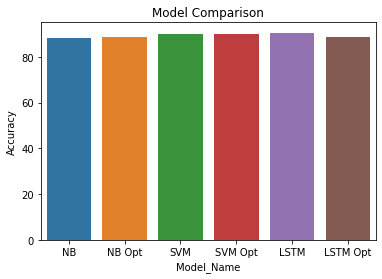

In [118]:
barcomp = sns.barplot(x = "Model_Name", y = "Accuracy", data = comp).set(title="Model Comparison")
print(comp)

In [134]:
NB_AUC =  round(roc_auc_score(y_test_conv, load_nb_pred), 6) 
SVM_AUC = round(roc_auc_score(y_test_conv, load_SVM_pred), 6)
LSTM_AUC = round(roc_auc_score(y_test, y_pred_lstm),6)
SVMOpt_AUC = round(roc_auc_score(y_test_conv, load_SVM_opt_pred),6)
NBOpt_AUC = round(roc_auc_score(y_test_conv, load_nb_opt_pred),6) 
LSTMOpt_AUC = round(roc_auc_score(y_test, LSTM_KerasTuner_pred),6)
Models_AUC = [NB_AUC, NBOpt_AUC, SVM_AUC, SVMOpt_AUC, LSTM_AUC,LSTMOpt_AUC]
AUC_group = list(zip(Model_Name, Models_AUC))
AUC_group = pd.DataFrame(AUC_group, columns = ['Model_Name', 'AUC Value'])

  Model_Name  AUC Value
0         NB   0.813401
1     NB Opt   0.812732
2        SVM   0.760749
3    SVM Opt   0.760749
4       LSTM   0.581948
5   LSTM Opt   0.500380


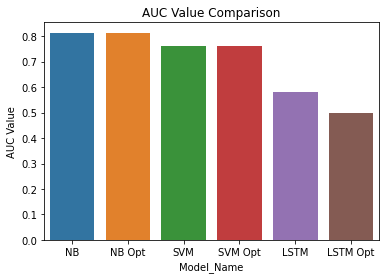

In [136]:
AUC_plot = sns.barplot(x = "Model_Name", y = "AUC Value", data = AUC_group).set(title="AUC Value Comparison")
print(AUC_group)

# Model Deployment Testing
## Naive Bayes Model Testing

In [137]:
#Random data from Dataset
temp = "ok I'm sick and spent an hour sitting in the shower cause I was too sick to stand and held back the puke like a champ. BED now"

In [138]:
def eval_avg(eval):
    return sum(eval)/len(eval)

In [139]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
temp = temp.lower()
temp = emoji.demojize(temp)
temp = nltk.word_tokenize(temp)

#remove punctuations
temp = [i for i in temp if i not in set(string.punctuation)]

#remove stop words
english_stops = set(stopwords.words('english'))
characters_to_remove = ["''",'``',"rt","https","’","“","”","\u200b","--","n't","'s","...","//t.c" ]
temp = [word for word in temp if word not in english_stops]
temp = [word for word in temp if word not in set(characters_to_remove)]
    
    #Lemmatize with POS Tagging
wordnet_lemmatizer = nltk.WordNetLemmatizer()
temp = [wordnet_lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in temp]

In [140]:
temp = [str (item) for item in temp]
vect = vectorizer.transform(temp)

In [142]:
load_nb = pickle.load(open("NaiveBayes_Model.sav", 'rb')) 
result_nb = load_nb.predict(vect)

In [143]:
result_nb = [int (item) for item in result_nb]
resultt_nb = eval_avg(result_nb)
output_nb = (resultt_nb > 0.5)

In [144]:
print(output_nb)

True


## LSTM & SVM deployment testing

In [91]:
result_SVM = load_SVM.predict(vect)
print(result_SVM)

['1' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0']


In [138]:
result_SVM = [int (item) for item in result_SVM]
resultt_SVM = eval_avg(result_SVM)
print(resultt_SVM)
output_SVM = (resultt_SVM > 0.5)
print(output_SVM)

0.25
False


In [136]:
result_SVM_opt = load_SVM_opt.predict(vect)
print(result_SVM_opt)

['1' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0']


In [140]:
result_SVM_opt = [int (item) for item in result_SVM_opt]
resultt_SVM_opt = eval_avg(result_SVM_opt)
print(resultt_SVM_opt)
output_SVM_opt = (resultt_SVM_opt > 0.5)
print(output_SVM_opt)

0.25
False


In [128]:
#Additional pre-process for LSTM
temp_LSTM = tokenizer.texts_to_sequences(temp)
temp_LSTM = sequence.pad_sequences(temp_LSTM)

In [119]:
result_LSTM = load_LSTM.predict(temp_LSTM)
print(result_LSTM)

[[0.98043096]
 [0.9319636 ]
 [0.06951746]
 [0.04471403]
 [0.85464966]
 [0.99634874]
 [0.9495189 ]
 [0.9119406 ]
 [0.06951746]
 [0.9972144 ]
 [0.9843594 ]
 [0.9172836 ]
 [0.7490925 ]
 [0.9377855 ]
 [0.9933132 ]
 [0.86518645]]


In [141]:
resultt_LSTM = eval_avg(result_LSTM)
print(resultt_LSTM)
output_lstm = (resultt_LSTM > 0.5)
print(output_lstm)

[0.76580226]
[ True]
